In [6]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
from collections import Counter
import seaborn as sns

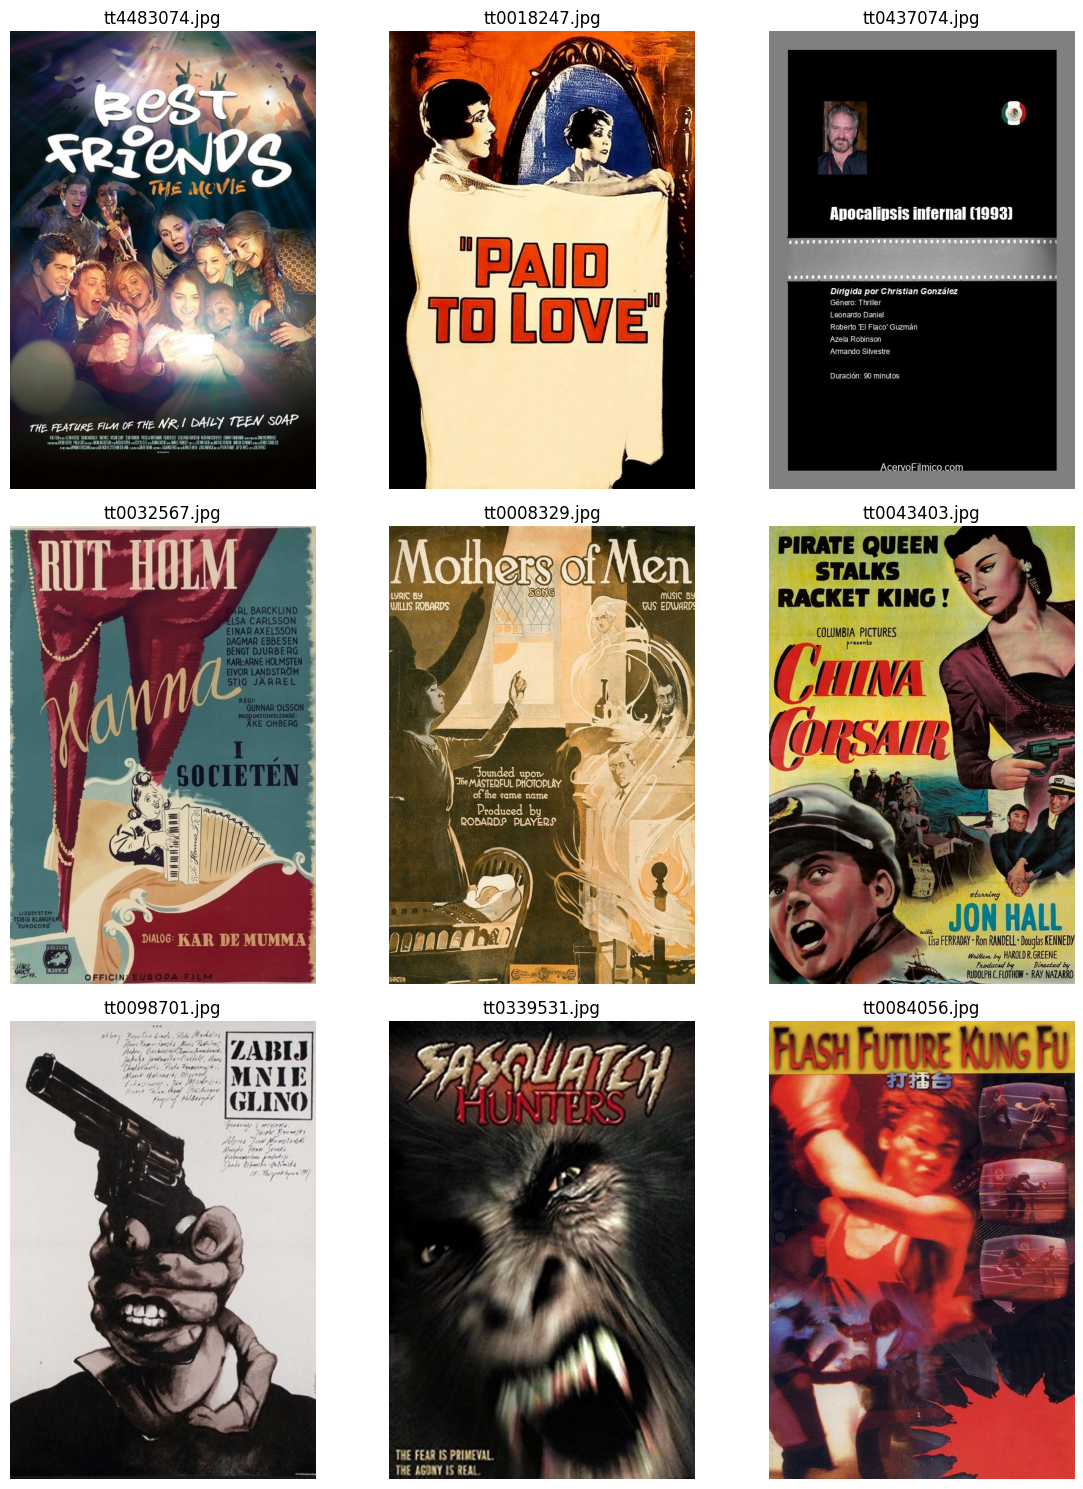

['tt4483074', 'tt0018247', 'tt0437074', 'tt0032567', 'tt0008329', 'tt0043403', 'tt0098701', 'tt0339531', 'tt0084056']
 movie_id                title                           genres                              img                    plot
tt0008329       Mothers of Men                        ['Drama'] /6cc3hVAmpjwHT3U1MCr0362G44f.jpg Dorothy ... womanhood!”
tt0018247         Paid to Love            ['Comedy', 'Romance'] /4lrX7h9siiPVqCeKyKIJPQlHoDX.jpg           An ... marry.
tt0032567     Hanna in Society                       ['Comedy'] /9iNa50yxVVvDxkoOCfN5fAKqcLG.jpg      When ... canceled.
tt0043403        China Corsair                    ['Adventure'] /xI3noqGQD4iiwbjd0b01Ta9nD6P.jpg             A ... jade.
tt0084056       Health Warning             ['Action', 'Sci-Fi'] /2txn6IS9sfq2lNIi9TvxisT0tsh.jpg       Imagine ... over.
tt0098701     Zabij mnie glino            ['Crime', 'Thriller'] /wnc3U7qZjQVtNdJbUsgrTUlx26v.jpg         The ... around.
tt0339531    Sasquatch Hunters ['Ac

C:\Users\satis\AppData\Local\Temp\ipykernel_42984\829414218.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rows['plot'] = selected_rows['plot'].apply(truncate_overview)


In [24]:


folder_path = 'C:/Users/satis/Downloads/datasets//posters'
csv_file_path = 'movies_with_posters.csv'
df = pd.read_csv(csv_file_path)

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

selected_images = random.sample(image_files, 9)

num_images = len(selected_images)

cols = 3
rows = (num_images // cols) + (num_images % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))

axes = axes.flatten()

for idx, image_file in enumerate(selected_images):
    img_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(img_path)

    axes[idx].imshow(img)
    axes[idx].axis('off')

    axes[idx].set_title(image_file)

for idx in range(num_images, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png', '.bmp'))]

image_movie_ids = [os.path.splitext(f)[0] for f in image_files]

selected_image_ids = [i.split('.')[0] for i in selected_images]

print(selected_image_ids)

selected_rows = df[df['movie_id'].isin(selected_image_ids)]
def truncate_overview(overview, max_length=100):

    words = overview.split()
    if len(overview) > 10 and len(words) > 4:
        truncated = ' '.join(words[:1]) + ' ... ' + ' '.join(words[-1:])
        return truncated
    else:
        return overview
selected_rows['plot'] = selected_rows['plot'].apply(truncate_overview)

print(selected_rows.to_string(index=False))


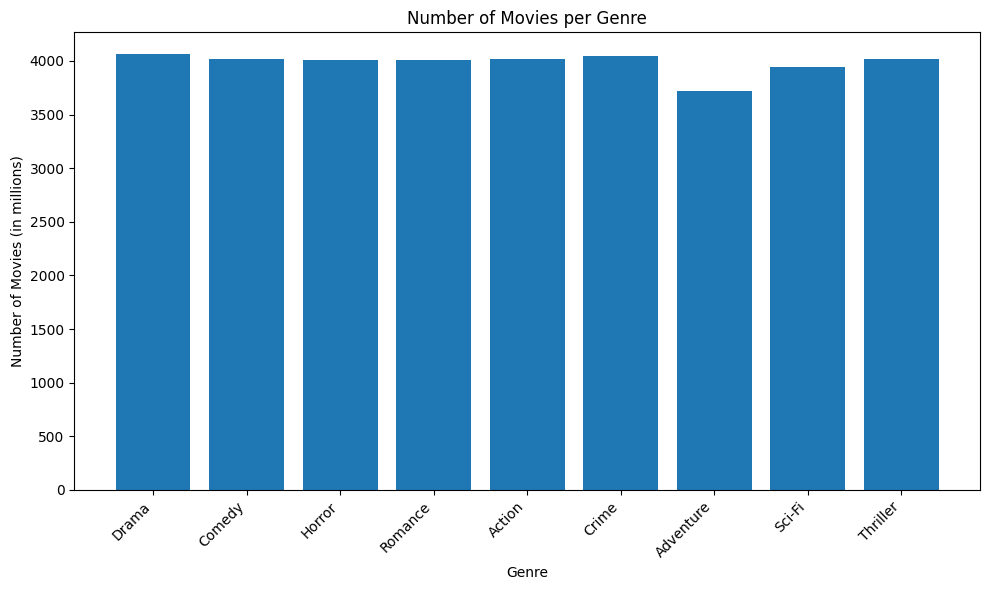

In [ ]:

def count_genres(df, genre_col, seperator ):
    genre_counter = Counter()
    
    for genre_string in df[genre_col]:
        if isinstance(genre_string, str):
            genres = ast.literal_eval(genre_string)
        else:
            genres = genre_string  # Already a list
        genre_counter.update(genres)
    
    return genre_counter
df = pd.read_csv("movies_with_posters.csv")
data = count_genres(df, "genres",",")
genres = list(data.keys())
counts = list(data.values())

plt.figure(figsize=(10, 6))
plt.bar(genres, counts)
plt.xlabel('Genre')
plt.ylabel('Number of Movies (in millions)')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

   Number of Generes  Movie Count
0                  1        15267
1                  2         6126
2                  3         2778


C:\Users\satis\AppData\Local\Temp\ipykernel_21032\3605170222.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Generes', y='Movie Count', data=genre_counts_df, palette='YlGnBu')


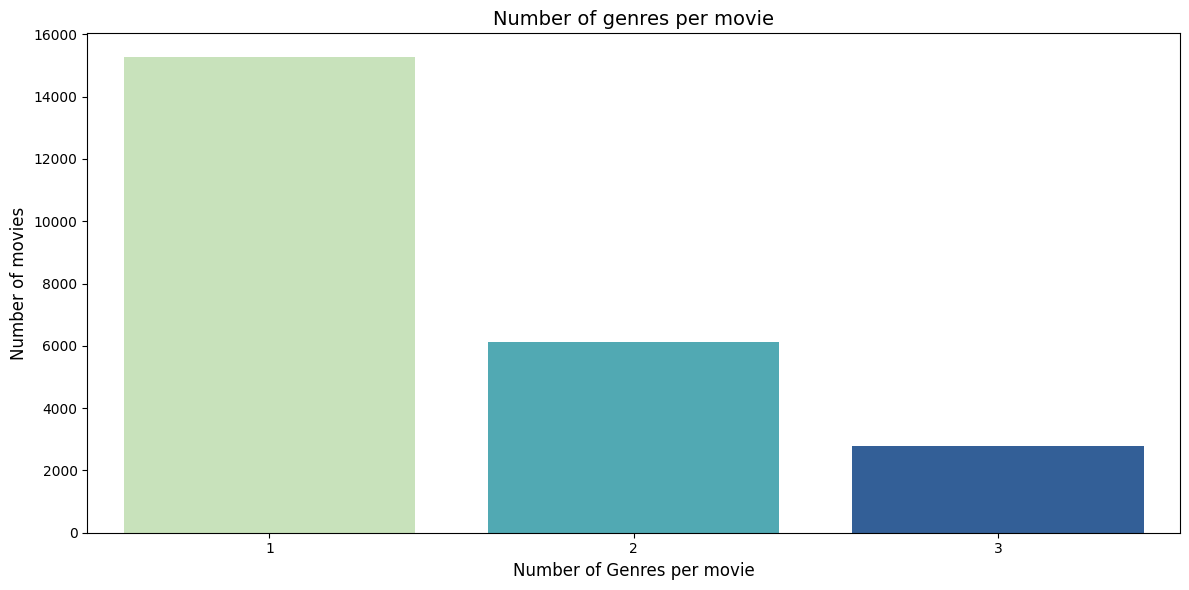

In [8]:
df = pd.read_csv("movies_with_posters.csv")

if isinstance(df["genres"].iloc[0], str): 
    df["genres"] = df["genres"].apply(eval)

genres_list = {'Sci-Fi', 'Comedy', 'Crime', 'Action', 'Thriller',
               'Horror','Drama', 'Adventure', 'Romance'}

genre_counts = Counter()

for genres in df["genres"]:
    temp=len(genres)
    if genre_counts.get(temp) != None:
        genre_counts[temp] +=1
    else:
        genre_counts[temp]=1

genre_counts_df = pd.DataFrame(genre_counts.items(), columns=["Number of Generes", "Movie Count"])
print(genre_counts_df)
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Generes', y='Movie Count', data=genre_counts_df, palette='YlGnBu')

plt.title('Number of genres per movie', fontsize=14)
plt.xlabel('Number of Genres per movie', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)

plt.tight_layout()
plt.show()

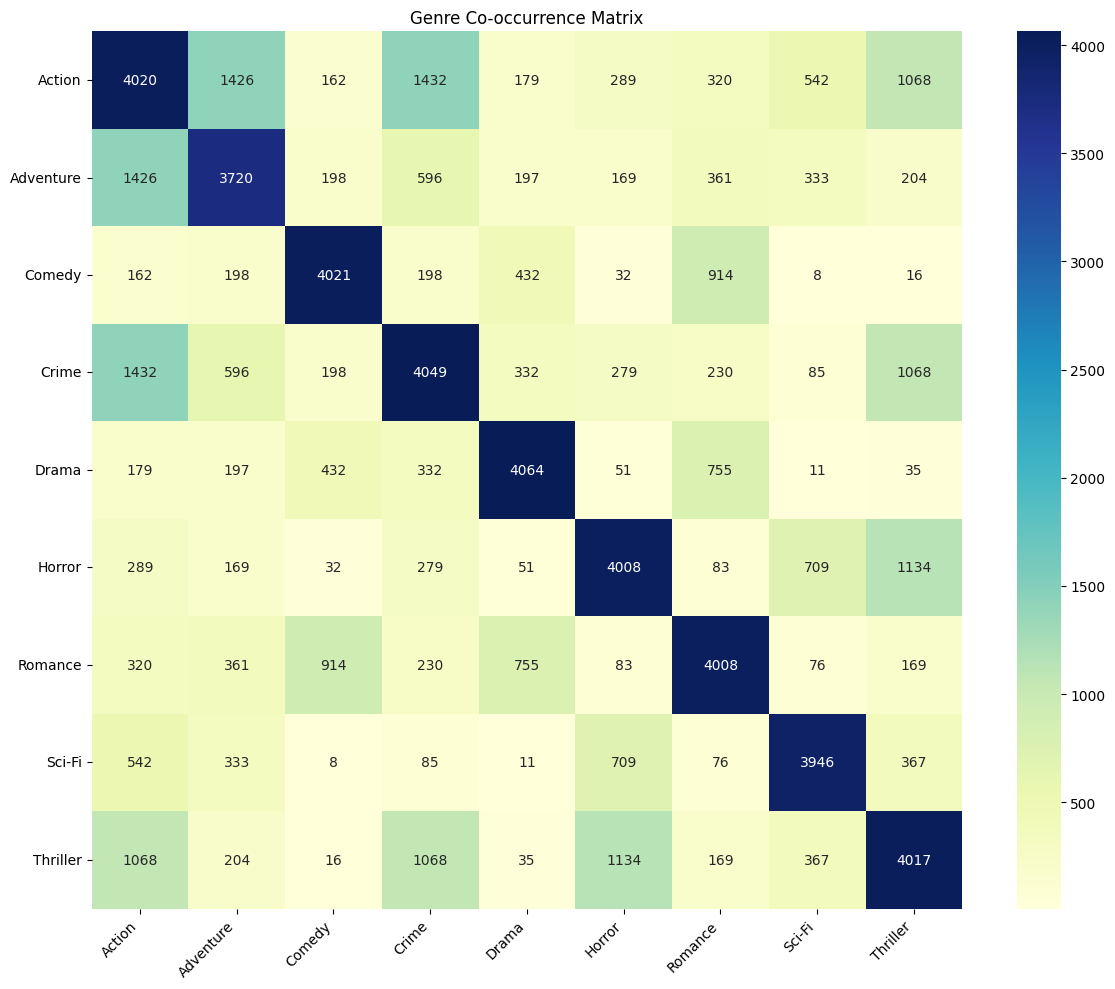

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('movies_with_posters.csv')

df['genres'] = df['genres'].apply(lambda x: [genre.strip() for genre in x.strip("[]").replace("'", "").split(',')])

from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genres'])

genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

co_occurrence = genre_df.T.dot(genre_df)

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Genre Co-occurrence Matrix")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
